## HW4.0 Final Project description

##### Project Proposal

Intelligent Tutoring Systems are helping saving millions of hours for students and helping them learn deeper. Students imbibe concepts at varying rates of learning. By predicting student performance on problems, content can be tailored to their needs. We have trainings around the year, which are often limited by its class size. Instead, if these trainings are delivered online adaptive to the learning ability of each employee, we can create a more skilled work force and also build a knowledge repository. The aim of the project is to predict student performance from the log of online trainings for algebra (KDD Cup 2010, Educational Data Mining Challenge. 

##### Data Source and Description 

The data is from the KDD cup. Four key terms form the building blocks of the data. These are problem (tasks for the student), step (observable part of the solution), knowledge component (concept required for a step), and opportunity (chance to demonstrate learning a knowledge component).

##### Steps

1. Data and Problem Understanding
2. Build baseline model on sample 
3. EDA
4. Build model on training set 
5. Test model on a hold out set of the data

##### Success metrics Primary- 

Prediction accuracy of student performance- (AUC for this binary classification task) Secondary- Similarity measures for knowledge components, Time saved in hours 


### HW4.1 Build a decision to predict whether you can play tennis or not

###### HW4.1.1 What is the classification accuracy of the tree on the training data?

###### Ans : 
The classification accuracy of a tree on a training dataset will be 100% because an ID3 algorithm will keep on splitting the tree till it reaches the maximum number of layers or till it runs out of examples.

##### HW4.1.2 Is it possible to produce some set of correct training examples that will get the algorihtm to include the attribute Temperature in the learned tree, even though the true target concept is independent of Temperature? if no, explain. If yes, give such a set.

##### Ans. 


###### HW4.1.3 Now, build a tree using only examples D1–D7. What is the classification accuracy for the training set? what is the accuracy for the test set (examples D8–D14)? explain why you think these are the results.

###### Ans. 
The accuracy in the training dataset (D1-D7) is 100%.

##### HW4.1.4 In this case, and others, there are only a few labelled examples available for training (that is, no additional data is available for testing or validation). Suggest a concrete pruning strategy, that can be readily embedded in the algorithm, to avoid over fitting. Explain why you think this strategy should work.

##### Ans. 
overfitting can be avoided using decision tree pruning or by limiting the depth of the tree.

### Decision Trees for Classification ID3

In [24]:
%%writefile dataset.txt
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no

Overwriting dataset.txt


In [25]:
f=open("/Users/z00193k/Desktop/DataScienceTrainingDocs/Assignments/DecisionTree/dataset.txt", "r")
inputs=[]
for line in f:
    inter=[]
    current={}
    splitline=[]
    splitline = line.split()
    current["outlook"]=splitline[1]
    current["temperature"]=splitline[2]
    current["humidity"]=splitline[3]
    current["wind"]=splitline[4]
    inter.append(current)
    inter.append(splitline[5])
    inter=tuple(inter)
    inputs.append(inter)

In [26]:
#calculating the entropy of the data

from __future__ import division
from collections import Counter, defaultdict
from functools import partial
import math, random

def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

def class_probabilities(labels):
    total_count = len(labels)
    return [count/total_count for count in Counter(labels).values()]

#This function will return the entropy of input dataset
def data_entropy(labeled_data):        
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

In [27]:
data_entropy(inputs)

0.9402859586706309

### Entropy of a Partition

In [28]:
def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)    
    return sum(data_entropy(subset)*len(subset)/total_count for subset in subsets )

In [31]:
def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item 
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups
    
def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
    return group_by(inputs, lambda x: x[0][attribute])

def partition_entropy_by(inputs, attribute):
    """computes the entropy corresponding to the given partition"""        
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

In [32]:
for key in['outlook','temperature','humidity','wind']:
    print key, partition_entropy_by(inputs, key)

outlook 0.693536138896
temperature 0.911063393012
humidity 0.788450457308
wind 0.892158928262


### Information Gain

In [33]:
attributes = ['outlook','temperature','humidity','wind']
def inf_gain(inputs, keys):
    for key in keys:
        IG=data_entropy(inputs)-partition_entropy_by(inputs, key)
        print key, IG

inf_gain(inputs, attributes)

outlook 0.246749819774
temperature 0.029222565659
humidity 0.151835501362
wind 0.0481270304083


In [34]:
def classify(tree, input):
    """classify the input using the given decision tree"""
    
    # if this is a leaf node, return its value
    if tree in [True, False]:
        return tree
   
    # otherwise find the correct subtree
    attribute, subtree_dict = tree
    
    subtree_key = input.get(attribute)  # None if input is missing attribute

    if subtree_key not in subtree_dict: # if no subtree for key,
        subtree_key = None              # we'll use the None subtree
    
    subtree = subtree_dict[subtree_key] # choose the appropriate subtree
    return classify(subtree, input)     # and use it to classify the input

In [35]:
def build_tree_id3(inputs, split_candidates=None):

    # if this is our first pass, 
    # all keys of the first input are split candidates
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()

    # count Trues and Falses in the inputs
    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues
    
    if num_trues == 0:                  # if only Falses are left
        return False                    # return a "False" leaf
        
    if num_falses == 0:                 # if only Trues are left
        return True                     # return a "True" leaf

    if not split_candidates:            # if no split candidates left
        return num_trues >= num_falses  # return the majority leaf
                            
    # otherwise, split on the best attribute
    best_attribute = min(split_candidates,
        key=partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates 
                      if a != best_attribute]
    
    # recursively build the subtrees
    subtrees = { attribute : build_tree_id3(subset, new_candidates)
                 for attribute, subset in partitions.iteritems() }

    subtrees[None] = num_trues > num_falses # default case

    return (best_attribute, subtrees)

print "building the tree"
tree = build_tree_id3(inputs)
print tree

building the tree
True


### HW4.3.1 Do a Kaggle Submission to Predict survival on the Titanic using Python

In [5]:
import sys
sys.path.append('/Users/z00193k/Desktop/DataScienceTrainingDocs/Assignments/DecisionTree/kaggle-titanic-master’)

SyntaxError: EOL while scanning string literal (<ipython-input-5-41ed82559b72>, line 2)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

ImportError: No module named KaggleAux

In [8]:
df = pd.read_csv("/Users/z00193k/Desktop/DataScienceTrainingDocs/Assignments/DecisionTree/kaggle-titanic-master/data/train.csv") 

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
len(df.index)-df.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dropping Missing Values

In [12]:
df = df.drop(['Ticket','Cabin'], axis=1) 
df = df.dropna()
len(df.index)-df.count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

##### EDA Graphically

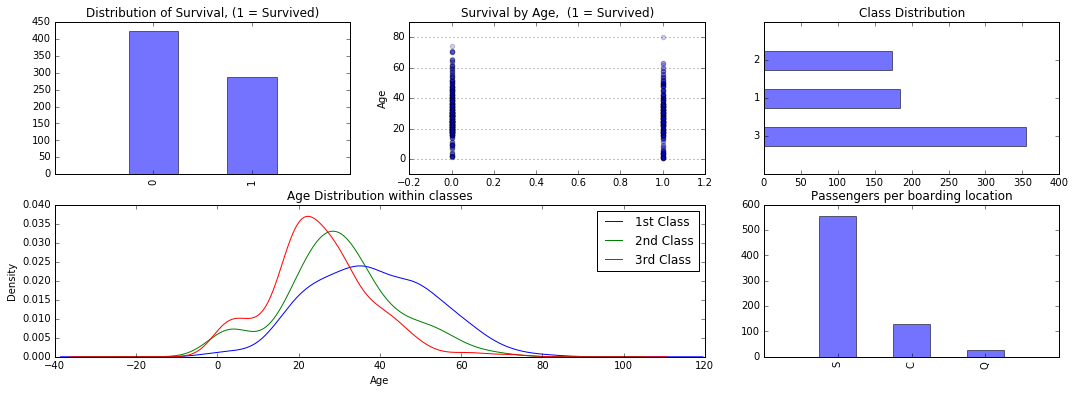

In [13]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

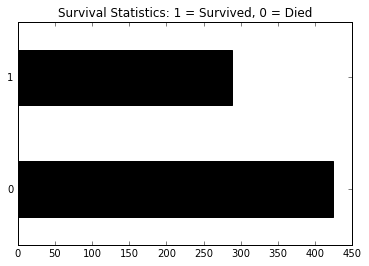

In [14]:
plt.figure(figsize=(6,4))
df.Survived.value_counts().plot(kind='barh', color = 'Black', alpha=1 )
plt.title('Survival Statistics: 1 = Survived, 0 = Died')

0    79.470199
1    20.529801
Name: Survived, dtype: float64
0    24.710425
1    75.289575
Name: Survived, dtype: float64


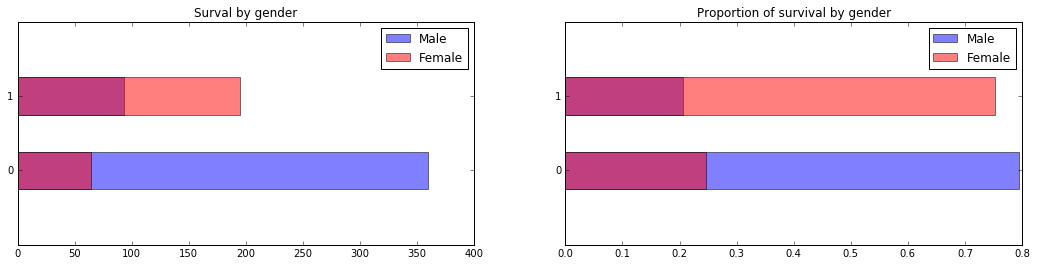

In [15]:
fig = plt.figure(figsize=(18,4))
df_male = df.Survived[df.Sex =='male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=.5)
df_female.plot(kind='barh', label='Female', color='red', alpha=.5)
plt.legend(loc='best')
plt.title('Surval by gender')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/df_male.sum()).plot(kind='barh',label='Male', alpha=.5)
(df_female/df_female.sum()).plot(kind='barh', label='Female', color='red', alpha=.5) 
plt.legend(loc='best')
plt.title('Proportion of survival by gender')
ax2.set_ylim(-1, 2)

print (df_male/df_male.sum())*100
print (df_female/df_female.sum())*100

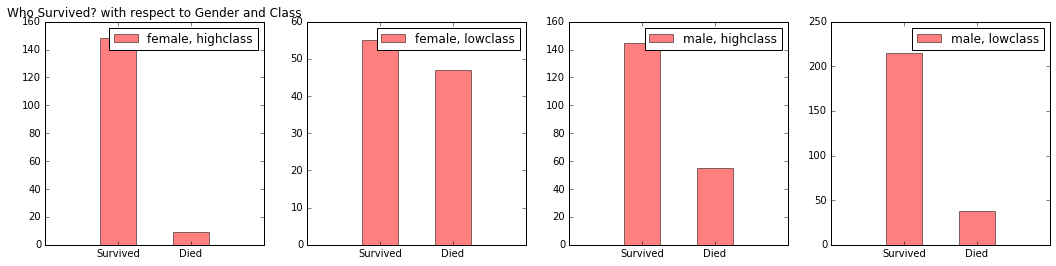

In [16]:
fig = plt.figure(figsize=(18,4))

ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='red', alpha=.5)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); 
plt.legend(loc='best')

ax2=fig.add_subplot(142)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass ==3].value_counts()
female_lowclass.plot(kind='bar', label = 'female, lowclass', color='red', alpha=0.5)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(female_highclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143)
female_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='male, highclass', color='red', alpha=.5)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
ax3.set_xlim(-1, len(female_highclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144)
female_lowclass = df.Survived[df.Sex == 'male'][df.Pclass ==3].value_counts()
female_lowclass.plot(kind='bar', label = 'male, lowclass', color='red', alpha=0.5)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.legend(loc='best')

In [18]:
#formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Emabarked)'
#results = {}